## [EJERCICIO 2]

La empresa está desarrollando una aplicación a modo TripAdvisor en la que los usuarios van a poder valorar una serie de restaurantes en base a su experiencia. Para que los restaurantes se adieran a la aplicación y quieran compartirla con sus clientes, estos desean saber, en base a sus características, que valoración pueden tener. Para ayudarles, hay que tratar de predecir la valoración (variable rate) que obtendría cada restaurante en base a las variables conocidas:

- name: Nombre del restaurante.
- online_order:¿Aceptan pedidos en línea? (Verdadero/Falso)
- book_table: ¿Podemos reservar mesa en el restaurante?
- rate: Valoración que dan los usuarios en la aplicación (variable objetivo).
- votes: Número de valoraciones realizadas a un restaurante.
- location: Ubicación del restaurante.
- rest_type: Tipo de restaurante.
- cuisines: Tipo de cocina.
- Cost2plate: Coste aproximado de dos platos.
- Type: Categoría del restaurante.

### La empresa solicita el siguiente informe: (APOYARSE EN GRAFICOS)
#### a) Ver el número de restaurantes por cada una de las localizaciones.
#### b) Conocer el número de restaurantes que permiten y no permiten pedidos online y aquellos que permiten reservar mesa.
#### c) Queremos conocer, mediante una visualización, cual es la distribución de la valoracion de los usuarios en función de si el restaurante permite o no pedidos online.
#### d) Queremos conocer, mediante una visualización, cual es la distribución de la valoracion de los usuarios en función de si el restaurante permite o no reservar mesa.
#### e) ¿Cual de las dos variables analizadas en los apartados d y C crees que sería más determinante de cara a un modelo de Machine Learning? ¿Por qué?
#### f) Realiza las transformaciones que creas necesarias en las variables, explicando cada una de ellas, de cara a crear un modelo de regresión que sea capaz de predecir la valoración de los usuarios.
#### g) Aplica un modelo de Regresión de los vistos en clase para tratar de predecir la valoración de los usuarios. Trata de mejorar los resultados aplicando otros modelos. (Regresión Lineal Múltiple, Árboles de Regresión o Random Forest Regressor)
#### h) Selecciona el mejor modelo basándote en la métrica del RMSE.

##### Deberás entrenar y validar el modelo seleccionado sobre el dataset "app_restaurantes.csv".

##### Deberás explicar todos los pasos que vayas dando en la resolución del problema.

In [1510]:
# A - 0.0 CARGA Y VISUALIZACION DE DATOS:

rest = pd.read_csv("app_restaurantes_clean.csv")
rest.head(12)

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
7,7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.0,Cafes
8,8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes
9,9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes


In [1512]:
# ELIMINAMOS LA VARIABLE SOBRANTE TIPO INDICE

rest = rest.drop(["Unnamed: 0"], axis=1)

In [1514]:
rest.shape

(51717, 10)

In [1516]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  object 
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   Cost2plate    51371 non-null  float64
 9   Type          51717 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.9+ MB


In [1518]:
# REVISION DE DATOS FALTANTES EN ABSOLUTOS Y EN PORCENTAJE:

print(rest.isna().sum(), "\n")
print((rest.isna().sum())/len(rest)*100)

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
Cost2plate        346
Type                0
dtype: int64 

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
Cost2plate       0.669026
Type             0.000000
dtype: float64


In [1520]:
rest.rate.str[-1:].value_counts()
# Verificamos que todas las puntuaciones estén en una escala sobre 5. Podemos quitar el sufijo y pasarlo a float.

rate
5    41665
Name: count, dtype: int64

In [1522]:
rest.rate = rest.rate.str[:3]

In [1524]:
rest.rate = rest.rate.astype(float)

In [1526]:
rest.rate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: rate
Non-Null Count  Dtype  
--------------  -----  
41665 non-null  float64
dtypes: float64(1)
memory usage: 404.2 KB


<Axes: xlabel='rate', ylabel='Count'>

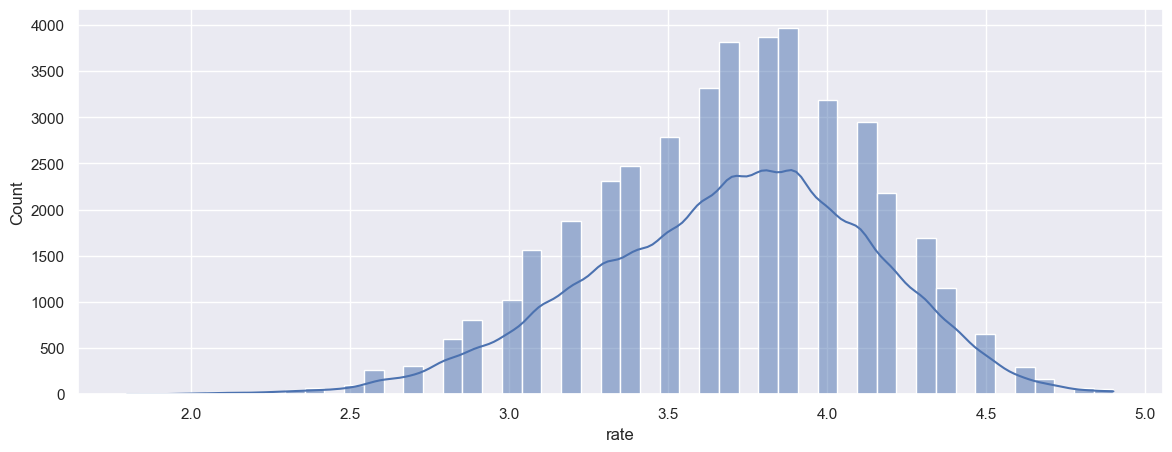

In [1528]:
# VISUALIZAMOS DISTRIBUCION POR CALIFICACIONES:

sns.set(rc={"figure.figsize":(14,5)})
sns.histplot(rest.rate, bins=50, kde=True)

In [1530]:
# RELLENAMOS NAN CON LAS MODAS:

rest.location = rest.location.fillna(rest.location.mode()[0])
rest.rest_type = rest.rest_type.fillna(rest.rest_type.mode()[0])
rest.cuisines = rest.cuisines.fillna(rest.cuisines.mode()[0])
rest.Cost2plate = rest.Cost2plate.fillna(rest.Cost2plate.median())

In [1532]:
# A - ANALISIS VARIABLE LOCATION:

df_location = pd.DataFrame({"amount" : rest.location.value_counts(), "pct" : rest.location.value_counts()/len(rest.location)*100})
len(df_location)

93

In [1534]:
# HAY 93 LOCALIZACIONES, POR COMODIDAD VISUALIZAMOS LAS 25 MAYORES (YA VIENEN ORDENADAS POR EL DF ANTERIOR):

df_location.head(25)

,amount,pct
location,,
BTM,5145,9.948373
HSR,2523,4.878473
Koramangala 5th Block,2504,4.841735
JP Nagar,2235,4.321596
Whitefield,2144,4.145639
Indiranagar,2083,4.027689
Jayanagar,1926,3.724114
Marathahalli,1846,3.569426
Bannerghatta Road,1630,3.151768


C:\Users\PC\AppData\Local\Temp\ipykernel_13292\861672088.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_loc.set_xticklabels(plot_loc.get_xticklabels(), rotation=60)


[Text(0, 0, 'BTM'),
 Text(1, 0, 'HSR'),
 Text(2, 0, 'Koramangala 5th Block'),
 Text(3, 0, 'JP Nagar'),
 Text(4, 0, 'Whitefield'),
 Text(5, 0, 'Indiranagar'),
 Text(6, 0, 'Jayanagar'),
 Text(7, 0, 'Marathahalli'),
 Text(8, 0, 'Bannerghatta Road'),
 Text(9, 0, 'Bellandur'),
 Text(10, 0, 'Electronic City'),
 Text(11, 0, 'Koramangala 1st Block'),
 Text(12, 0, 'Brigade Road'),
 Text(13, 0, 'Koramangala 7th Block'),
 Text(14, 0, 'Koramangala 6th Block'),
 Text(15, 0, 'Sarjapur Road'),
 Text(16, 0, 'Ulsoor'),
 Text(17, 0, 'Koramangala 4th Block'),
 Text(18, 0, 'MG Road'),
 Text(19, 0, 'Banashankari'),
 Text(20, 0, 'Kalyan Nagar'),
 Text(21, 0, 'Richmond Road'),
 Text(22, 0, 'Frazer Town'),
 Text(23, 0, 'Malleshwaram'),
 Text(24, 0, 'Basavanagudi')]

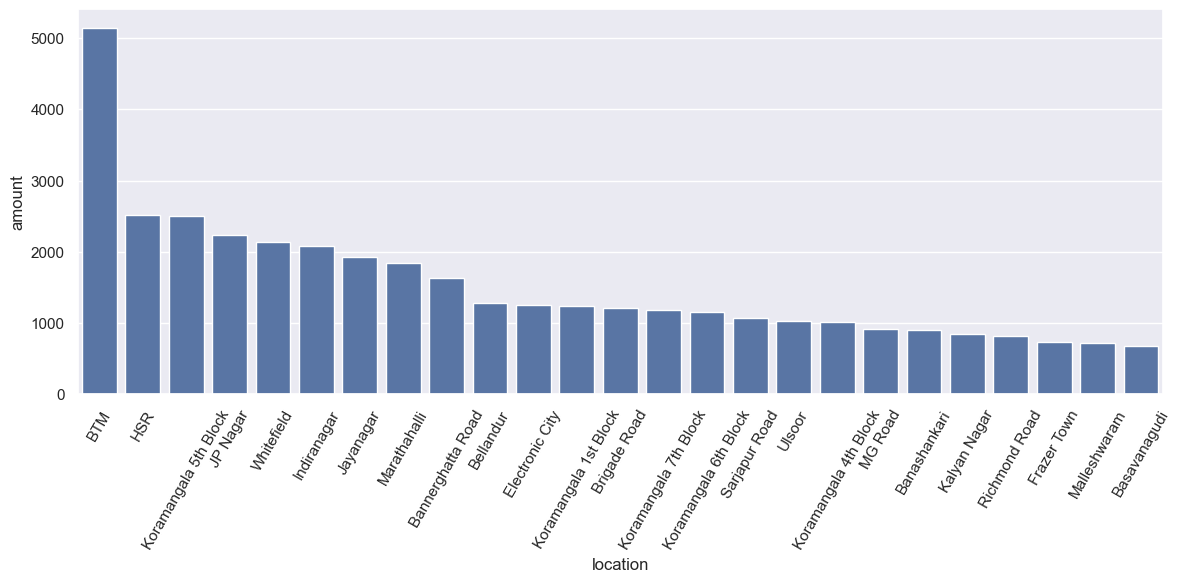

In [1536]:
# LO VISUALIZAMOS MEDIANTE BARRAS

plot_loc = sns.barplot(df_location.amount.head(25))
plot_loc.set_xticklabels(plot_loc.get_xticklabels(), rotation=60)

In [1538]:
# B1 - ANALISIS POR POSIBILIDAD DE HACER PEDIDOS ONLINE:

rest.online_order.value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

<Axes: xlabel='online_order', ylabel='count'>

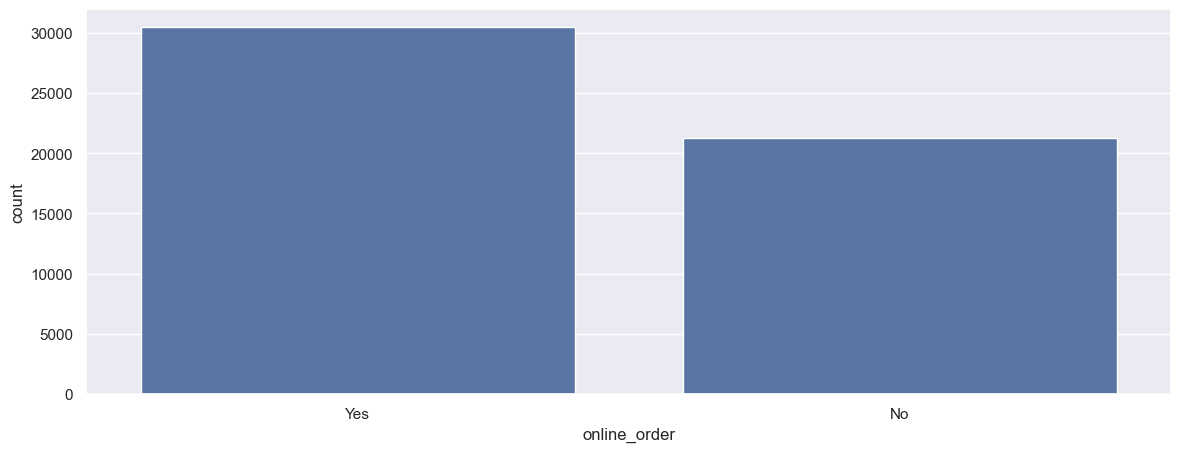

In [1540]:
sns.barplot(rest.online_order.value_counts())

In [1542]:
# B2 - ANALISIS POR POSIBILIDAD DE RESERVAR MESA:

rest.book_table.value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

<Axes: xlabel='book_table', ylabel='count'>

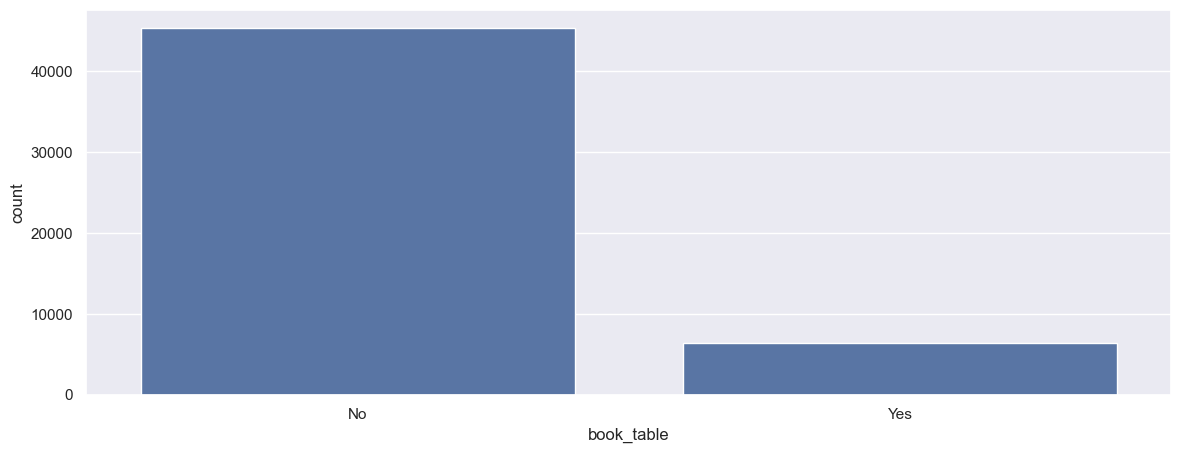

In [1544]:
sns.barplot(rest.book_table.value_counts())

# SE OBSERVA UNA DISTRIBUCION MUY DESBALANCEADA:

In [1546]:
# C - PARA EL ANALISIS RELACIONADO A LA VARIABLE OBJETIVO, UNA OPCION PUEDE SER DIVIDIR EL DS ENTRE LOS QUE TIENEN RATE Y LOS QUE NO.
#     A PARTIR DE AQUI CALCULAREMOS LOS DATOS A PARTIR DE LAS ENTRADAS QUE SÍ TIENEN RATES.

rest.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location            0
rest_type           0
cuisines            0
Cost2plate          0
Type                0
dtype: int64

In [1548]:
# DS SIN NAN:

rest_full_a = rest[rest['rate'].notna()]

In [1550]:
rest_full_a.shape

(41665, 10)

In [1552]:
rest_full_a.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2plate      0
Type            0
dtype: int64

In [1554]:
# DS con los NAN:

rest_nan = rest[rest['rate'].isna()]

In [1560]:
rest_nan.shape

(10052, 10)

In [1562]:
rest_nan.isna().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location            0
rest_type           0
cuisines            0
Cost2plate          0
Type                0
dtype: int64

<Axes: xlabel='rate', ylabel='Count'>

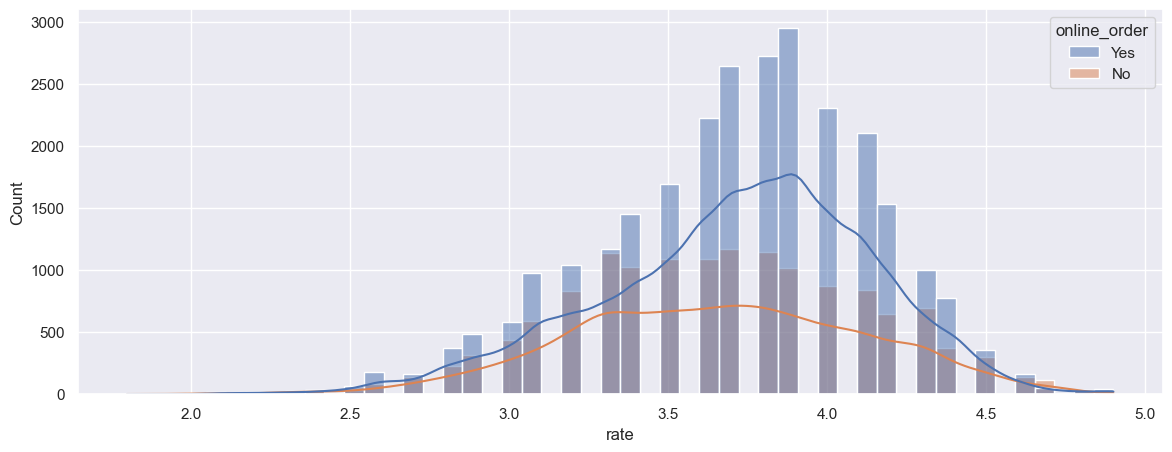

In [1564]:
# C - VALORACIÓN SEGUN SI SE ACEPTAN O NO PEDIDOS ONLINE
# Aprovechamos el tipo de gráfico anterior, esta vez separando por colores la variable "online_orders".

sns.set(rc={"figure.figsize":(14,5)})
sns.histplot(rest_full_a, x=rest_full_a.rate, bins=50, kde=True, hue=rest_full_a.online_order)

# Se aprecian más calificaciones en general para los restaurantes que sí aceptan, e incluso una mejor nota (mediana más a la derecha) para éstos:

<Axes: xlabel='rate', ylabel='Count'>

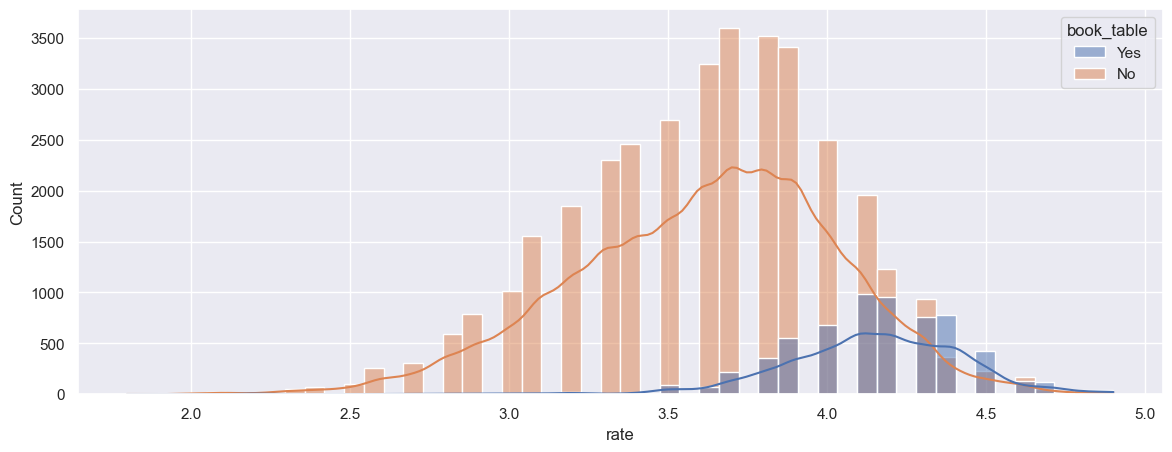

In [1566]:
# D - VALORACIÓN SEGUN SI SE ACEPTAN O NO PEDIDOS RESERVAS DE MESAS
# Aprovechamos el tipo de gráfico anterior, esta vez separando por colores la variable "book_table".

sns.set(rc={"figure.figsize":(14,5)})
sns.histplot(rest_full_a, x=rest_full_a.rate, bins=50, kde=True, hue=rest_full_a.book_table)

# En este caso vemos muchos más restaurantes que no aceptan reservas, pero con una valoración (mediana) menor que los que sí aceptan reservas:

In [ ]:
# E - ¿Cual de las dos variables analizadas en los apartados D y C crees que sería más determinante de cara a un modelo de Machine Learning? ¿Por qué?
# --> Diría que definitivamente "book_table" está mucho más diferenciada en cuanto a las valoraciones

In [ ]:
# f) Realiza las transformaciones que creas necesarias en las variables, explicando cada una de ellas, de cara a crear un modelo de regresión que sea capaz de predecir la valoración de los usuarios.

In [1568]:
# F - Empezamos revisando aquellas otras variables aún sin analizar
rest_full_a.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [1570]:
print(rest_full_a.rest_type.nunique())
print(rest_full_a.cuisines.nunique())
print(rest_full_a.Type.nunique())

87
2383
7


In [1572]:
# De los anteriores, rest_type y cuisines contienen múltiples opciones y combinaciones, lo que haría muy complejo su análisis e incidencia sobre las valoraciones.
# Damos una ojeada a Type por si viésemos algún patrón singular:

# Sacamos la distribución por tipo de restaurante:
type_ratio = rest_full_a.Type.value_counts()/len(rest_full_a)
type_ratio

Type
Delivery              0.495596
Dine-out              0.340982
Desserts              0.065571
Cafes                 0.036625
Drinks & nightlife    0.025321
Buffet                0.020521
Pubs and bars         0.015385
Name: count, dtype: float64

In [1574]:
# Generamos un DS a partir del cálculo previo:

type_pct = type_ratio.reset_index()
type_pct.columns = ['Type', 'ratio']
type_pct

,Type,ratio
0,Delivery,0.495596
1,Dine-out,0.340982
2,Desserts,0.065571
3,Cafes,0.036625
4,Drinks & nightlife,0.025321
5,Buffet,0.020521
6,Pubs and bars,0.015385


In [1576]:
# Calculamos las medias de valoración por tipo:

type_mean = rest_full_a.groupby("Type").agg(mean_rate=("rate", "mean"))
type_mean

,mean_rate
Type,
Buffet,3.982105
Cafes,3.872477
Delivery,3.653257
Desserts,3.777013
Dine-out,3.680826
Drinks & nightlife,4.017062
Pubs and bars,4.022933


In [1578]:
# Unificamos ambas tablas:

type_merged = pd.merge(type_pct, type_mean, on='Type', how='left')
type_merged

,Type,ratio,mean_rate
0,Delivery,0.495596,3.653257
1,Dine-out,0.340982,3.680826
2,Desserts,0.065571,3.777013
3,Cafes,0.036625,3.872477
4,Drinks & nightlife,0.025321,4.017062
5,Buffet,0.020521,3.982105
6,Pubs and bars,0.015385,4.022933


<Axes: xlabel='mean_rate', ylabel='ratio'>

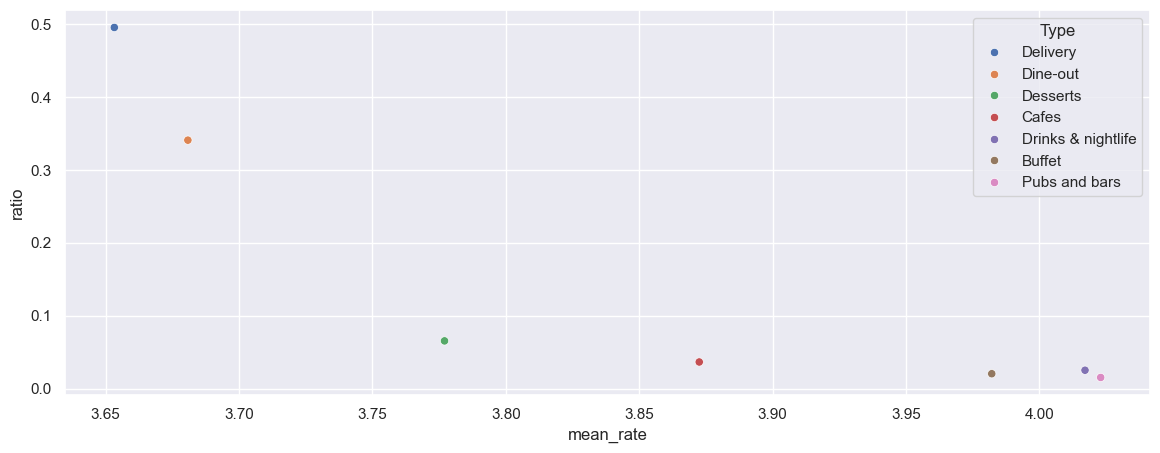

In [1580]:
sns.scatterplot(x=type_merged.mean_rate, y=type_merged.ratio, hue=type_merged.Type)

In [ ]:
# A priori se aprecia una horquilla importante en las valoraciones según el tipo, al márgen de las cantidades de votos.
# Curiosamente a mayor número de votos, peor la valoración.
# Para un primer análisis, probamos dejar esta variable "Type" codificada.

In [1582]:
# Similar a la variable anterior, retomamos "location" para ver su relación con las valoraciones y número de restaurantes:

location_count = rest_full_a.location.value_counts()

# Generamos un DS a partir del cálculo previo:

location_ct = location_count.reset_index()
location_ct.columns = ['location', 'count']
location_ct['count'] = location_ct['count'].astype(float)
location_ct

,location,count
0,BTM,3930.0
1,Koramangala 5th Block,2319.0
2,HSR,2019.0
3,Indiranagar,1847.0
4,JP Nagar,1717.0
...,...,...
87,Yelahanka,5.0
88,West Bangalore,3.0
89,Rajarajeshwari Nagar,2.0
90,Nagarbhavi,1.0


In [1584]:
# Calculamos las medias de valoración media por localidad:

loc_mean = rest_full_a.groupby("location").agg(mean_rate=("rate", "mean"))
loc_mean

,mean_rate
location,
BTM,3.573740
Banashankari,3.649866
Banaswadi,3.496042
Bannerghatta Road,3.507449
Basavanagudi,3.671092
...,...
West Bangalore,3.366667
Whitefield,3.621618
Wilson Garden,3.536364


In [1586]:
# Unimos los DS previos

loc_merged = pd.merge(location_ct, loc_mean, on='location', how='left')

In [1588]:
# Al tratarse de 92 distintos valores nos centramos en los primeros 25 por facilitar su visualización:

loc_merged_25 = loc_merged.head(25)

In [1590]:
# Hay que crear una columna nueva para count, que permita operar con ella, pues proviene de un value_counts y da fallo a veces al tratarlo como "method"

loc_merged_25["Count"] = loc_merged_25["count"].astype(int)
loc_merged_25

C:\Users\PC\AppData\Local\Temp\ipykernel_13292\1567957682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_merged_25["Count"] = loc_merged_25["count"].astype(int)


,location,count,mean_rate,Count
0,BTM,3930.0,3.573740,3930
1,Koramangala 5th Block,2319.0,4.005821,2319
2,HSR,2019.0,3.672164,2019
3,Indiranagar,1847.0,3.828154,1847
4,JP Nagar,1717.0,3.675306,1717
5,Jayanagar,1643.0,3.780280,1643
6,Whitefield,1582.0,3.621618,1582
7,Marathahalli,1443.0,3.541927,1443
8,Bannerghatta Road,1235.0,3.507449,1235
9,Koramangala 6th Block,1077.0,3.778087,1077


<Axes: xlabel='mean_rate', ylabel='Count'>

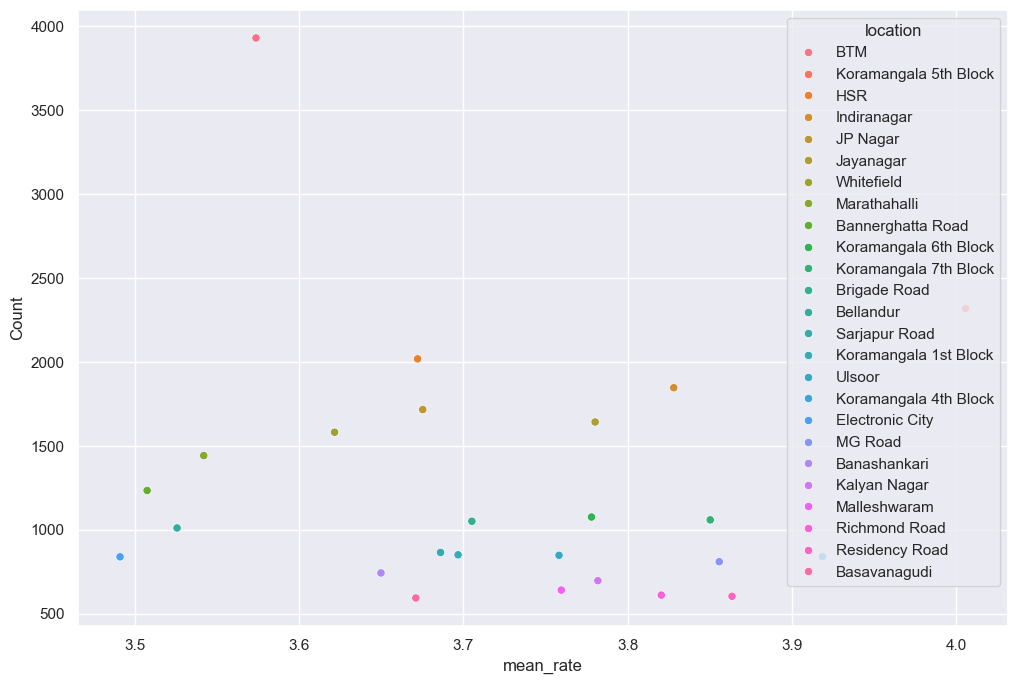

In [1592]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=loc_merged_25.mean_rate, y=loc_merged_25.Count, hue=loc_merged_25.location)

In [ ]:
# Podría usarse location para predicción del rate pero su alta variedad lo haría muy complejo y pesado. Descartamos location finalmente.

In [1594]:
# Variable votes:
rest_full_a.sort_values(by='votes', ascending=False).head(25)

# Se observan muchas líneas repetidas si descontamos la variable Type. Habría que hacer una limpieza pues es posible que haya valoraciones falsas o compradas.

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
49627,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Dine-out
49170,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Delivery
50059,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife
4944,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife
4801,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Dine-out
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Delivery
18643,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,Dine-out
19268,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,Drinks & nightlife
36668,Truffles,No,No,4.7,14726,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,Dine-out
36000,Truffles,No,No,4.7,14723,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,Delivery


<Axes: xlabel='rate', ylabel='votes'>

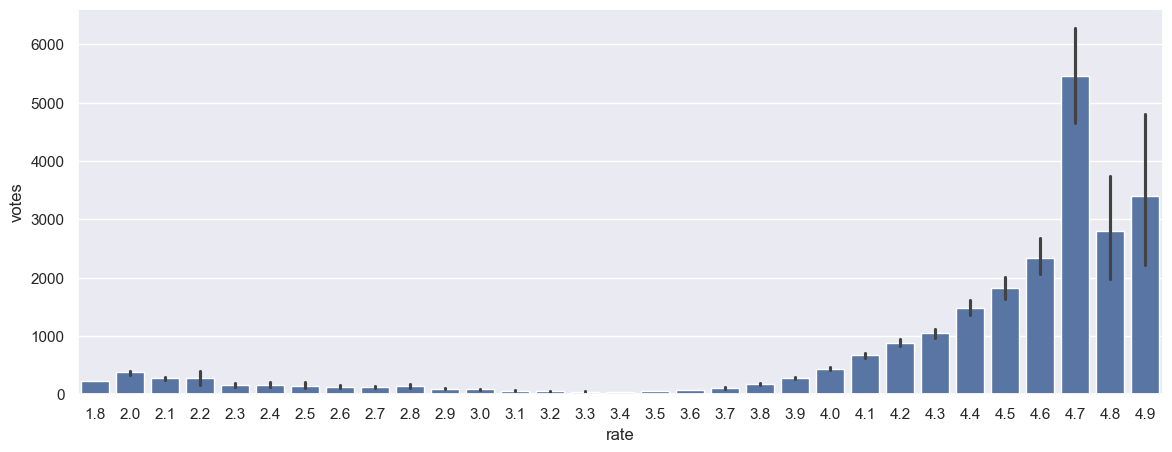

In [1598]:
# Graficamente se concentran en valoraciones muy altas:

sns.barplot(x=rest_full.rate, y=rest_full.votes)

In [1600]:
# Redefinimos el DS quitando aquellas entradas duplicadas por el criterio nombre + ubicación + tipo de restaurante + votos:

rest_full = rest_full_a.drop_duplicates(subset=['name', 'location', 'rest_type', 'votes'])

In [1604]:
rest_full.shape

# pasamos de 40K a 16K entradas !!!

(16318, 10)

<Axes: xlabel='Cost2plate', ylabel='Count'>

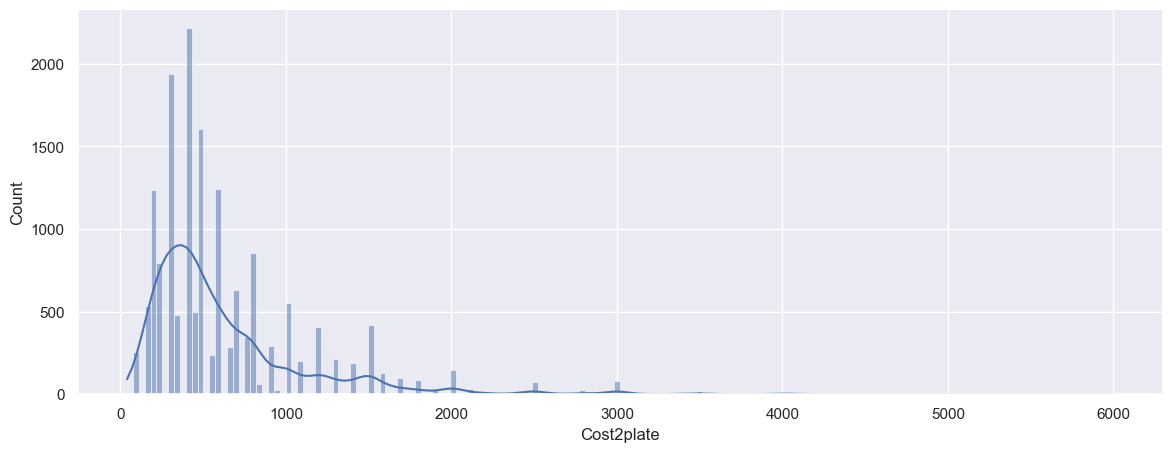

In [1606]:
# Variable Cost2plate:

sns.histplot(rest_full, x=rest_full.Cost2plate, bins="auto", kde=True)

In [1608]:
# Para ver su relación (y de las demás variables de interés) con la objetivo lo mejor es pintar un heatmap de su correlación.
# Codificamos las variables objeto primero:

rest_full_oh = pd.get_dummies(rest_full, columns=['online_order','book_table', 'Type'], drop_first=True)

In [1610]:
rest_full_oh.head()

,name,rate,votes,location,rest_type,cuisines,Cost2plate,online_order_Yes,book_table_Yes,Type_Cafes,Type_Delivery,Type_Desserts,Type_Dine-out,Type_Drinks & nightlife,Type_Pubs and bars
0,Jalsa,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,True,True,False,False,False,False,False,False
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,True,False,False,False,False,False,False,False
2,San Churro Cafe,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,True,False,False,False,False,False,False,False
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,False,False,False,False,False,False,False,False
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,False,False,False,False,False,False,False,False


In [1612]:
# Definimos nuevo DS codificado y con las variables de interés:

rest_new = rest_full_oh[["rate", "votes", "Cost2plate", "online_order_Yes", "book_table_Yes", "Type_Cafes", "Type_Delivery", "Type_Desserts", "Type_Dine-out", "Type_Drinks & nightlife", "Type_Pubs and bars"]]

<Axes: >

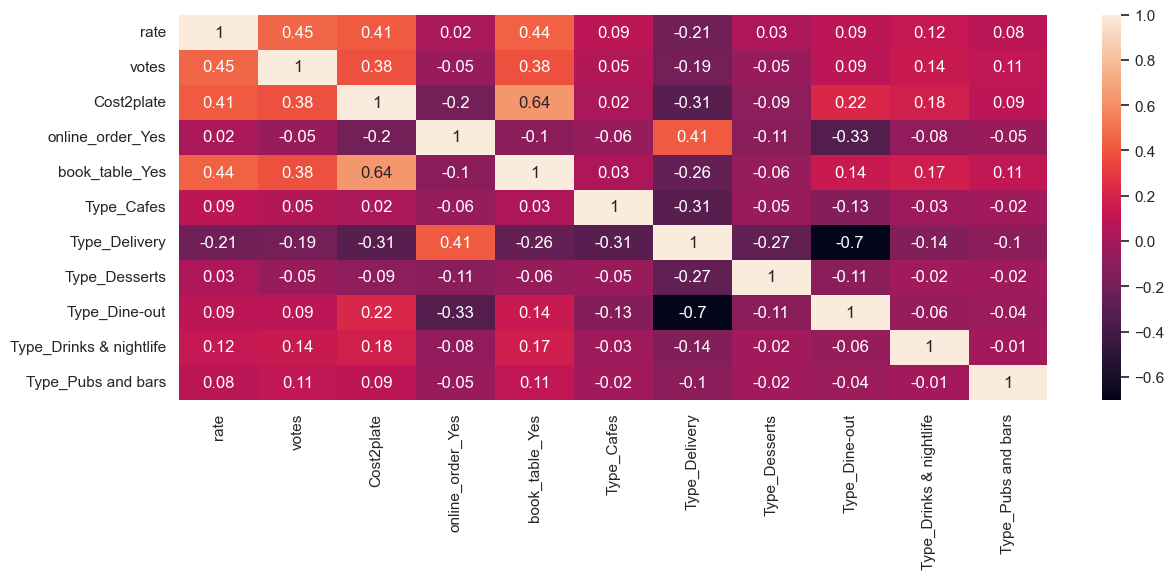

In [1614]:
# Analisis de matriz de correlación

cm = rest_new.corr().round(2)
sns.heatmap(data=cm, annot=True)

# Las variables más relacionadas son: votes, book_table, Cost2plate y Type_Delivery

In [1616]:
# A continuación contrastamos el resultado anterior con los feature importances del random forest regressor

X_rf = rest_new.drop('rate', axis=1)
y = rest_new.rate

In [1618]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_rf, y)

RandomForestRegressor()

In [1622]:
importancias = rf.feature_importances_
forest_importances = pd.Series(importancias, index=X_rf.columns)

Text(0.5, 1.0, 'Importancia de las variables')

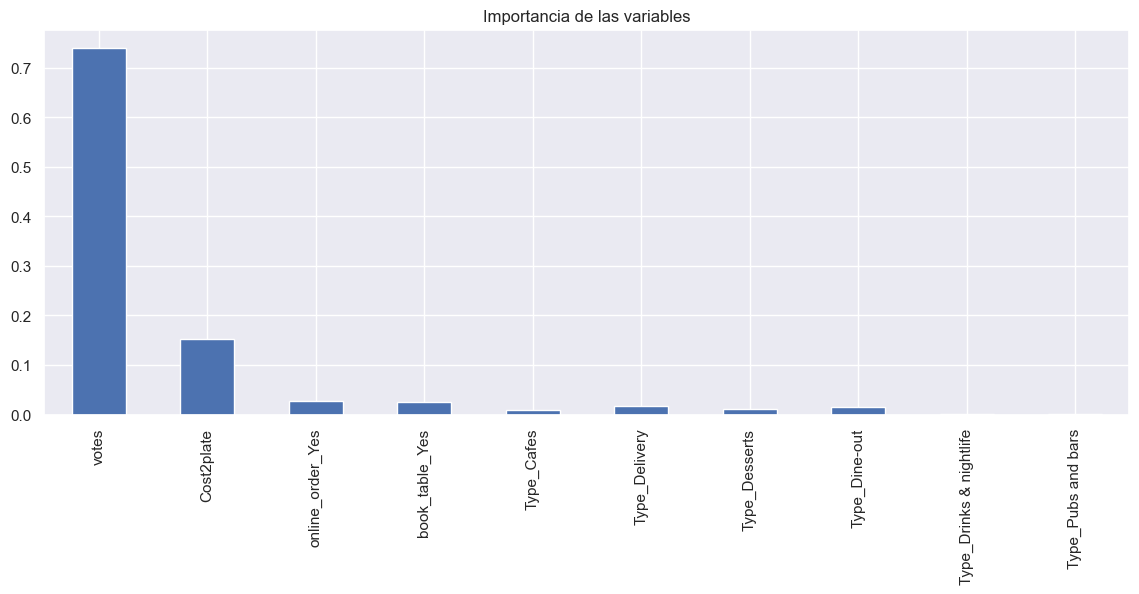

In [1624]:
forest_importances.plot.bar().set_title("Importancia de las variables")

# Las variables más relacionadas son: votes, Cost2plate, online_order, y book_table
# Tres de estas coinciden con la matriz de correlación, pero mantenemos estas últimas 4 referentes al feature importances.

In [1626]:
# Definimos la X de acuerdo a lo anterior:

X = rest_new[["votes", "Cost2plate", "online_order_Yes", "book_table_Yes"]]

In [ ]:
# g) Aplica un modelo de Regresión de los vistos en clase para tratar de predecir la valoración de los usuarios. Trata de mejorar los resultados aplicando otros modelos. (Regresión Lineal Múltiple, Árboles de Regresión o Random Forest Regressor)


In [1628]:
# Separamos datos de train y de test::

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1630]:
# Escalado de X:

sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

In [1632]:
# LINEAR REGRESSION:

lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
y_pt = lr.predict(X_train_sc)

In [1634]:
# RMSE TEST:

rmse_lr = mean_squared_error(y_test, y_pred, squared = False)
rmse_lr_tr = mean_squared_error(y_train, y_pt, squared = False)
print("LINEAR REGRESSION: ", "\n", "RMSE_test = ", rmse_lr)
print("RMSE_train = ", rmse_lr_tr)

LINEAR REGRESSION:  
 RMSE_test =  0.38233807683956217
RMSE_train =  0.37494945251914225


In [1636]:
# DECISSION TREE REGRESSOR:

dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train_sc, y_train)
y_pred_dtr = dtr.predict(X_test_sc)
y_pt_dtr = dtr.predict(X_train_sc)

In [1638]:
rmse_dtr = mean_squared_error(y_test, y_pred_dtr, squared = False)
rmse_tr_dtr = mean_squared_error(y_train, y_pt_dtr, squared = False)
print("DECISSION TREE REGRESSOR: ", "\n", "RMSE_test = ", rmse_dtr)
print("RMSE_train = ", rmse_tr_dtr)

DECISSION TREE REGRESSOR:  
 RMSE_test =  0.4043533723832706
RMSE_train =  0.19300767316822076


In [1640]:
# RANDOM FOREST REGRESSOR:

rfr = RandomForestRegressor(random_state = 0)
rfr.fit(X_train_sc, y_train)
y_pred_rfr = rfr.predict(X_test_sc)
y_pt_rfr = rfr.predict(X_train_sc)

In [1641]:
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared = False)
rmse_tr_rfr = mean_squared_error(y_train, y_pt_rfr, squared = False)
print("RANDOM FOREST REGRESSOR: ", "\n", "RMSE_test = ", rmse_rfr)
print("RMSE_train = ", rmse_tr_rfr)

RANDOM FOREST REGRESSOR:  
 RMSE_test =  0.35067260877518214
RMSE_train =  0.2102567378519423


In [1330]:
# Probamos optimizarlo con GridSearchCV

parameters = {'n_estimators': [10, 50, 100, 150, 200],
                  'min_samples_leaf': [5, 10, 15, 20],
                  'max_depth': [4, 6, 8, 10]
                 }

In [1644]:
grid_forest = GridSearchCV(estimator=rfr, param_grid = parameters)

In [1646]:
grid_forest.fit(X_train_sc, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [1648]:
grid_forest.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}

In [1650]:
y_pred_rfr_grid = grid_forest.best_estimator_.predict(X_test_sc)
rmse_rfr_grid = mean_squared_error(y_test, y_pred_rfr_grid, squared = False)
y_pt_rfr_grid = grid_forest.best_estimator_.predict(X_train_sc)
rmse_rfr_tr_grid = mean_squared_error(y_train, y_pt_rfr_grid, squared = False)
print("RANDOM FOREST REGRESSOR (GRID): ", "\n", "RMSE_test = ", rmse_rfr_grid)
print("RMSE_train = ", rmse_rfr_tr_grid)

RANDOM FOREST REGRESSOR (GRID):  
 RMSE_test =  0.32601636626412617
RMSE_train =  0.29949445064825453


In [1652]:
y_pt_rfr_grid = grid_forest.best_estimator_.predict(X_train_sc)
rmse_rfr_tr_grid = mean_squared_error(y_train, y_pt_rfr_grid, squared = False)
rmse_rfr_tr_grid

0.29949445064825453

In [ ]:
# h) Selecciona el mejor modelo basándote en la métrica del RMSE

# --> el mejor resultado lo ha entregado el Random Forest Regressor tras su optimización del grid search: RMSE = 0.326

In [1654]:
# Ahora podemos predecir las valoraciones faltantes del DS original:

rest_nan.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
72,Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,North Indian,150.0,Delivery
75,Om Sri Vinayaka Chats,No,No,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,Delivery
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100.0,Delivery
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500.0,Delivery
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400.0,Delivery


In [1656]:
rest_nan.votes.sum() # verificamos que la variable votes no esté toda en ceros.

20362

In [1658]:
# Quitamos posibles duplicados según el mismo criterio del cálculo anterior:

rest_nan_nd = rest_nan.drop_duplicates(subset=['name', 'location', 'rest_type', 'votes'])

In [1660]:
print("rest_nan:", rest_nan.shape)
print("rest_nan_nd:", rest_nan_nd.shape)

# Bajamos de 10K a 3K entradas:

rest_nan: (10052, 10)
rest_nan_nd: (3262, 10)


In [1662]:
# Discretizamos variables de interés: online_order, y book_table

rest_nan_nd_oh = pd.get_dummies(rest_nan_nd, columns=['online_order','book_table'], drop_first=True)

In [1664]:
rest_nan_nd_oh.head()

,name,rate,votes,location,rest_type,cuisines,Cost2plate,Type,online_order_Yes,book_table_Yes
72,Spicy Tandoor,NaN,0,Banashankari,Quick Bites,North Indian,150.0,Delivery,False,False
75,Om Sri Vinayaka Chats,NaN,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,Delivery,False,False
84,Chill Out,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100.0,Delivery,False,False
90,Me And My Cake,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500.0,Delivery,False,False
91,Sunsadm,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400.0,Delivery,False,False


In [1666]:
# Definición de nueva X2:

X2 = rest_nan_nd_oh[["votes", "Cost2plate", "online_order_Yes", "book_table_Yes"]]

In [1668]:
# Escalado de la variable X2:

X2_sc = sc_x.fit_transform(X2)

In [1670]:
# Cálculo de nueva variable objetivo y2:

y2 = grid_forest.best_estimator_.predict(X2_sc)

In [1672]:
# Integramos el resultado al DS:

rest_nan_nd_oh["rate"] = y2.round(1)

In [1674]:
rest_nan_nd_oh.head()

,name,rate,votes,location,rest_type,cuisines,Cost2plate,Type,online_order_Yes,book_table_Yes
72,Spicy Tandoor,4.2,0,Banashankari,Quick Bites,North Indian,150.0,Delivery,False,False
75,Om Sri Vinayaka Chats,3.7,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500.0,Delivery,False,False
84,Chill Out,4.2,0,Banashankari,Quick Bites,"South Indian, Chinese",100.0,Delivery,False,False
90,Me And My Cake,3.7,0,Banashankari,Delivery,"Bakery, Desserts",500.0,Delivery,False,False
91,Sunsadm,3.9,0,Banashankari,"Takeaway, Delivery",South Indian,400.0,Delivery,False,False


<Axes: xlabel='rate', ylabel='Count'>

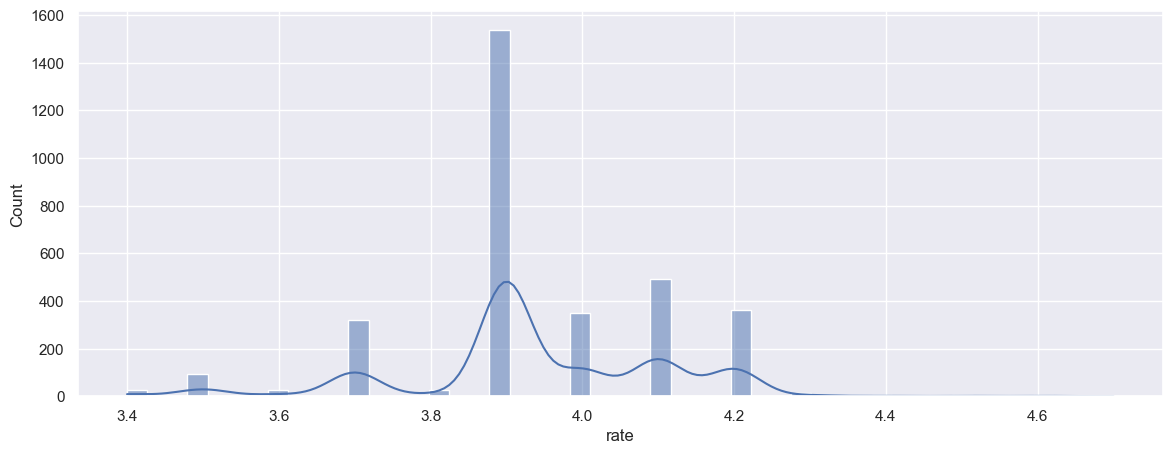

In [1676]:
# Visualización de la predicción completa:

sns.histplot(rest_nan_nd_oh["rate"], kde=True)

<Axes: xlabel='rate', ylabel='Count'>

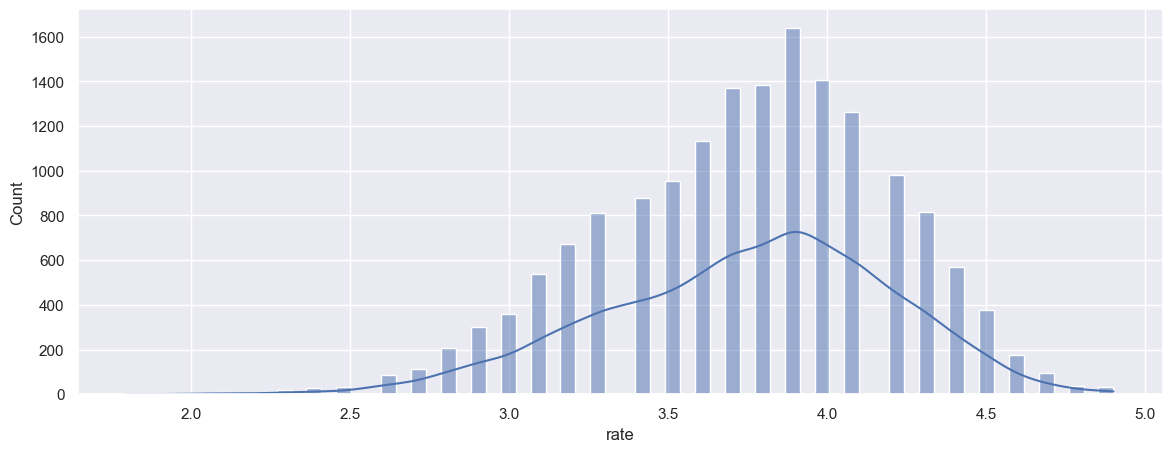

In [1678]:
# Comparativa con el DS anterior de entrenamiento:

sns.histplot(rest_full_oh["rate"], kde=True)

In [ ]:
# Hacemos una comparativa de los dos DS a unificar:

In [1680]:
rest_nan_nd_oh.shape

(3262, 10)

In [1682]:
rest_full_oh.shape

(16318, 15)

In [1684]:
rest_full_oh.columns

Index(['name', 'rate', 'votes', 'location', 'rest_type', 'cuisines',
       'Cost2plate', 'online_order_Yes', 'book_table_Yes', 'Type_Cafes',
       'Type_Delivery', 'Type_Desserts', 'Type_Dine-out',
       'Type_Drinks & nightlife', 'Type_Pubs and bars'],
      dtype='object')

In [1686]:
rest_nan_nd_oh.columns

Index(['name', 'rate', 'votes', 'location', 'rest_type', 'cuisines',
       'Cost2plate', 'Type', 'online_order_Yes', 'book_table_Yes'],
      dtype='object')

In [ ]:
# Selección de las mismas variables de interés en ambos DS:

In [1688]:
rest_full_oh_m = rest_full_oh[['name', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'Cost2plate', 'online_order_Yes', 'book_table_Yes']]
rest_full_oh_m.shape

(16318, 9)

In [1690]:
rest_nan_nd_oh_m = rest_nan_nd_oh[['name', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'Cost2plate', 'online_order_Yes', 'book_table_Yes']]
rest_nan_nd_oh_m.shape

(3262, 9)

In [1692]:
# Merge:

rest_merged = pd.merge(rest_full_oh_m, rest_nan_nd_oh_m, on=['name', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'Cost2plate', 'online_order_Yes', 'book_table_Yes'], how='outer')

In [1694]:
rest_merged.head()

,name,rate,votes,location,rest_type,cuisines,Cost2plate,online_order_Yes,book_table_Yes
0,Jalsa,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,True,True
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,True,False
2,San Churro Cafe,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,True,False
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,False,False
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,False,False


In [1696]:
rest_merged.shape

(19579, 9)

In [1698]:
# Verificación de entradas tras el merge de los DS:

len(rest_full_oh_m) + len(rest_nan_nd_oh_m)

19580

In [1700]:
# Chequeo de valores nulos tras el merge:

rest_merged.isna().sum()

name                0
rate                0
votes               0
location            0
rest_type           0
cuisines            0
Cost2plate          0
online_order_Yes    0
book_table_Yes      0
dtype: int64

In [1702]:
# Reevaluación del modelo con el DS unificado:

X3 = rest_merged[['votes', 'Cost2plate', 'online_order_Yes', 'book_table_Yes']]
y3 = rest_merged.rate

In [1704]:
# Separamos datos de train y de test::

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)

In [1706]:
# Escalado de variables de entrenamiento:

X3_train_sc = sc_x.fit_transform(X3_train)
X3_test_sc = sc_x.transform(X3_test)

In [1708]:
# RANDOM FOREST REGRESSOR con valores por defecto:

rfr = RandomForestRegressor(random_state = 0)
rfr.fit(X3_train_sc, y3_train)
y3_pred_rfr = rfr.predict(X3_test_sc)
y3_pt_rfr = rfr.predict(X3_train_sc)

In [1710]:
rmse3_rfr = mean_squared_error(y3_test, y3_pred_rfr, squared = False)
rmse3_tr_rfr = mean_squared_error(y3_train, y3_pt_rfr, squared = False)
print("RANDOM FOREST REGRESSOR: ", "\n", "RMSE_test = ", rmse3_rfr)
print("RMSE_train = ", rmse3_tr_rfr)

RANDOM FOREST REGRESSOR:  
 RMSE_test =  0.3116772224186654
RMSE_train =  0.19597145751429576


In [1712]:
# Optimización del modelo:

grid_forest.fit(X3_train_sc, y3_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [1713]:
grid_forest.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}

In [1714]:
y3_pred_rfr_grid = grid_forest.best_estimator_.predict(X3_test_sc)
rmse3_rfr_grid = mean_squared_error(y3_test, y3_pred_rfr_grid, squared = False)
y3_pt_rfr_grid = grid_forest.best_estimator_.predict(X3_train_sc)
rmse3_rfr_tr_grid = mean_squared_error(y3_train, y3_pt_rfr_grid, squared = False)
print("RANDOM FOREST REGRESSOR (GRID): ", "\n", "RMSE_test = ", rmse3_rfr_grid)
print("RMSE_train = ", rmse3_rfr_tr_grid)

RANDOM FOREST REGRESSOR (GRID):  
 RMSE_test =  0.28961127670429654
RMSE_train =  0.28066886554614573


In [ ]:
# Tras añadir los datos predichos a partir de las filas con rate = NaN, el modelo mejora su métrica RMSE,
# lo cual es de esperarse pues los datos añadidos orvienen justamente de su propia predicción.